# Predicting Employee Turnover Use Case

# Part 1 : Problem Statement

A certain company has approached us as a data science team to help them in their business problem they are currently facing. The company is facing an issue where it loses a lot of its employees which results to them underperfoming because they dont have enough hands or workers to help the company perform with its competitions and stay on the market. They approached us so wwe can try and help them determine what causes the employees to leave and how they can turnover or keep their current empployees in their compmay happy. 

#### Objectives and Goals

- Find ways to keep current employees in the company.
- find what makes employees to leave.
- find ways to turnover new employees into the company.

#### Data gathering

The data was downloaded online for this project in order to support the above problem statement.
It is not an illegal data.

# Part 2 : Data Analysis

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = 17,8 
%matplotlib inline

import plotly as plot
import plotly.express as px
import plotly.graph_objs as go

import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

### Import Dataset

In [3]:
df = pd.read_csv(r'dataset\hr_data.csv')
df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


### Exploring Dataset

In [4]:
# check the shape
df.shape

(14999, 9)

In [5]:
# check the size of the dataframe
df.size

134991

In [6]:
# Returns an object with all of the column headers
df.columns

Index(['employee_id', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years',
       'department', 'salary'],
      dtype='object')

In [7]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

employee_id               int64
number_project            int64
average_montly_hours      int64
time_spend_company        int64
Work_accident             int64
left                      int64
promotion_last_5years     int64
department               object
salary                   object
dtype: object

#### Comment

### Numerical Analysis

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,14999.0,45424.627575,25915.900127,1003.0,22872.5,45448.0,67480.5,99815.0
number_project,14999.0,3.803054,1.232592,2.0,3.0,4.0,5.0,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.0,156.0,200.0,245.0,310.0
time_spend_company,14999.0,3.498233,1.460136,2.0,3.0,3.0,4.0,10.0
Work_accident,14999.0,0.144610,0.351719,0.0,0.0,0.0,0.0,1.0
left,14999.0,0.238083,0.425924,0.0,0.0,0.0,0.0,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.0,0.0,0.0,0.0,1.0


#### Comment

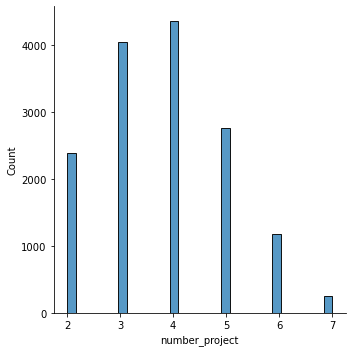

In [9]:
# distribution for number of projects for employees
sns.displot(df['number_project'])

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='number_project', ylabel='Density'>

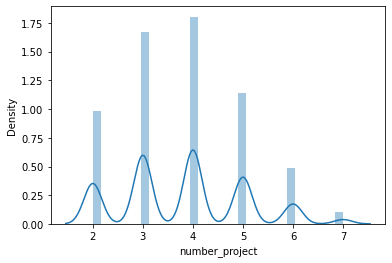

In [10]:
# distribution for number of projects for employees
sns.distplot(df['number_project'])

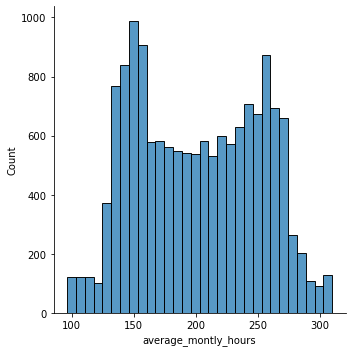

In [12]:
# distribution for avg monthly hours
sns.displot(df['average_montly_hours'])

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='average_montly_hours', ylabel='Density'>

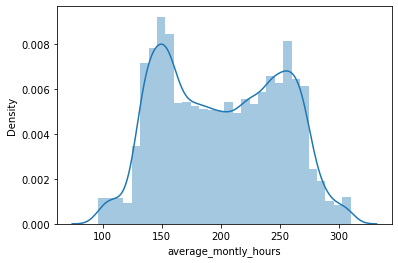

In [14]:
# distribution for avg monthly hours
sns.distplot(df['average_montly_hours'])

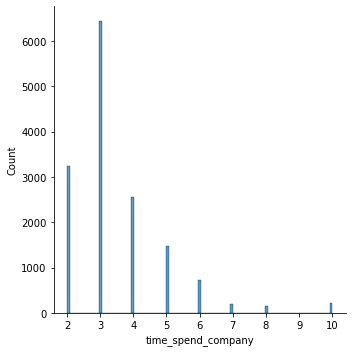

In [15]:
# distribution for time spent on company in terms of years
sns.displot(df['time_spend_company'])

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='time_spend_company', ylabel='Density'>

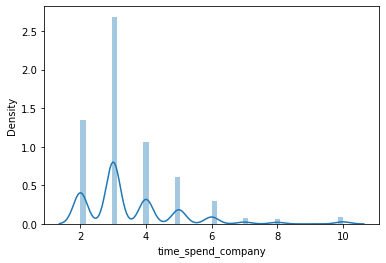

In [16]:
# distribution for time spent on company in terms of years
sns.distplot(df['time_spend_company'])

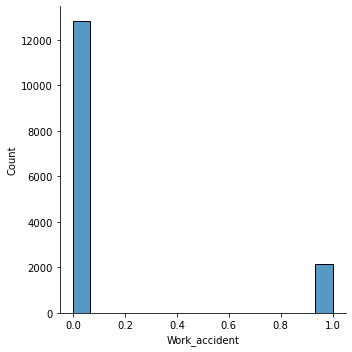

In [18]:
# distribution for work accident
sns.displot(df['Work_accident'])

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Work_accident', ylabel='Density'>

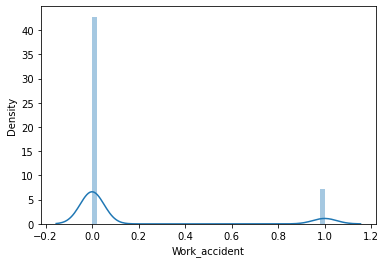

In [19]:
# distribution for work accident
sns.distplot(df['Work_accident'])

In [20]:
# check the number of promotions againts the number of non promotions. Promotions =1, no promotion = 0
df['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

#### Comment

### Categorical Analysis

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [22]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [23]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Text(0.5, 1.0, 'Number of Projects by employee departments')

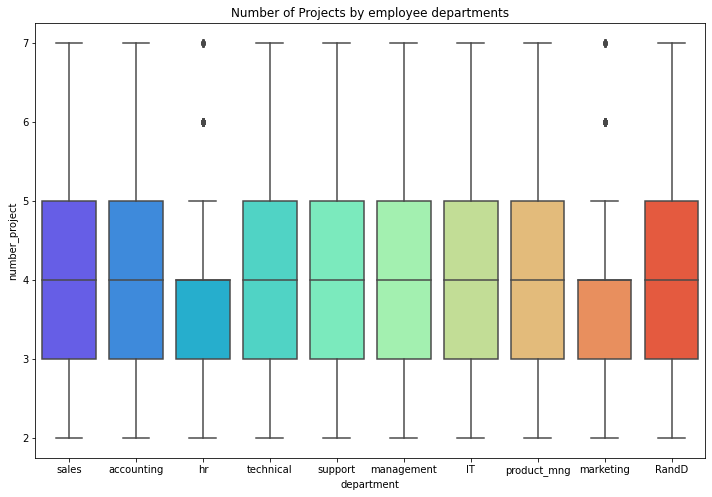

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(x='department',y='number_project',data=df, palette='rainbow')
plt.title("Number of Projects by employee departments")

Text(0.5, 1.0, 'average monthly hours by employee departments')

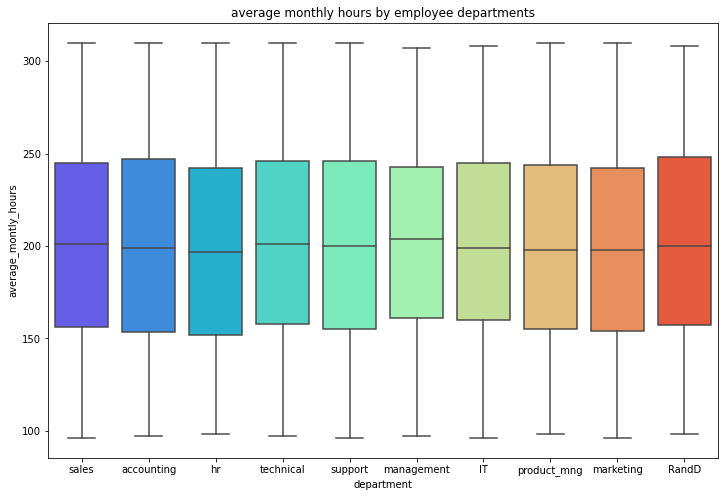

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(x='department',y='average_montly_hours',data=df, palette='rainbow')
plt.title("average monthly hours by employee departments")

In [27]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [28]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Text(0.5, 1.0, 'Number of Projects by salary')

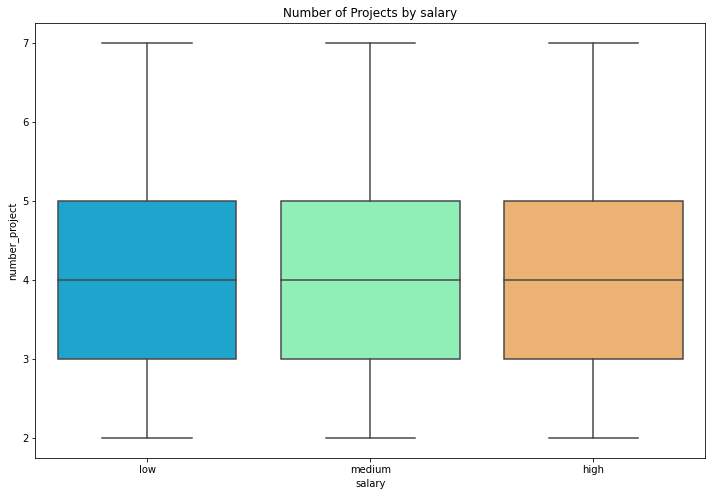

In [29]:
plt.figure(figsize=(12,8))
sns.boxplot(x='salary',y='number_project',data=df, palette='rainbow')
plt.title("Number of Projects by salary")

Text(0.5, 1.0, 'Time spent on company by salary')

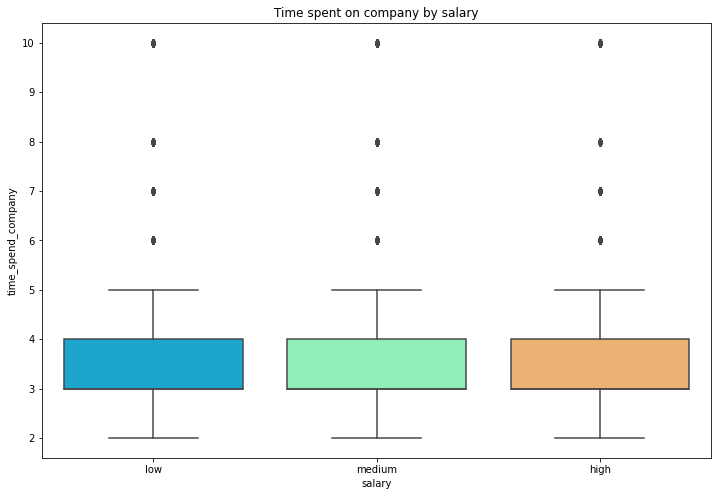

In [30]:
plt.figure(figsize=(12,8))
sns.boxplot(x='salary',y='time_spend_company',data=df, palette='rainbow')
plt.title("Time spent on company by salary")

# Part 3 : Pre-processing

##### Column Transformation

In [31]:
# importing the  employee satisfaction level data
employee_satisfaction_df = pd.read_excel('dataset\employee_satisfaction_evaluation.xlsx')

In [32]:
employee_satisfaction_df.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [33]:
# since both dataframes have  employee id's for its employees, it will be a great idea to merge the two dataframes since they have 
# common id's and make them one.
main_df = df.set_index("employee_id").join(employee_satisfaction_df.set_index('EMPLOYEE #'))

In [34]:
main_df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
employee_id,,,,,,,,,,
1003,2,157,3,0,1,0,sales,low,0.38,0.53
1005,5,262,6,0,1,0,sales,medium,0.80,0.86
1486,7,272,4,0,1,0,sales,medium,0.11,0.88
1038,5,223,5,0,1,0,sales,low,0.72,0.87
1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [35]:
main_df = main_df.reset_index()

In [36]:
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


##### Missing Values

In [37]:
main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,14999.0,45424.627575,25915.900127,1003.00,22872.50,45448.00,67480.50,99815.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
satisfaction_level,14972.0,0.612830,0.248714,0.09,0.44,0.64,0.82,1.0
last_evaluation,14972.0,0.716125,0.171138,0.36,0.56,0.72,0.87,1.0


In [38]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   satisfaction_level     14972 non-null  float64
 10  last_evaluation        14972 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [39]:
# to get all the null rows in the dataframe
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [40]:
# fill in the null values 
main_df.fillna(main_df.mean(), inplace = True)

In [41]:
# check the null values if they are still there
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation


In [42]:
# drop the column employeee id
main_df.drop(columns='employee_id', inplace = True)

In [43]:
# check the number of projects each department has in total
main_df.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [44]:
# check the number of projects each department has in average
main_df.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [45]:
#check the number of people in each department
main_df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [46]:
# check how many employees left 
main_df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

##### Outliers

##### Visualization

In [47]:
def plot_corr(df, size =10):
    '''creating a correlation matrix for a size 10 column dataframe'''
    # get the correlation matrix
    corr = df.corr()
    # plot the matrix
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    

No handles with labels found to put in legend.


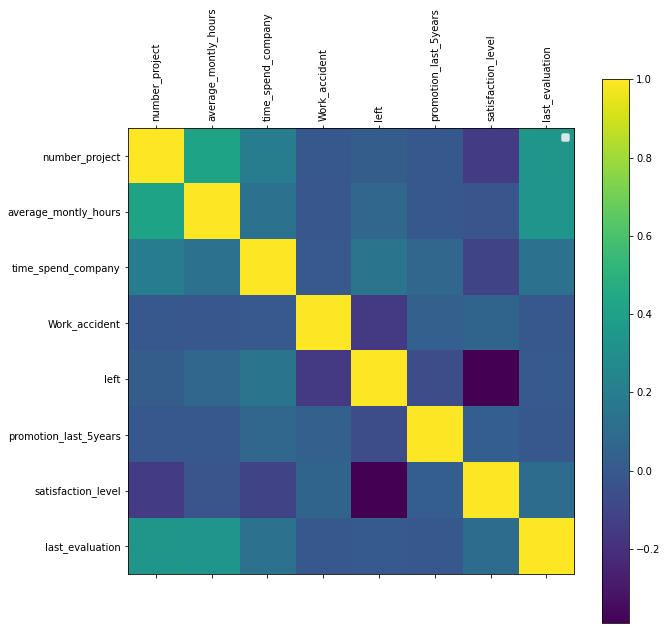

In [48]:
plot_corr(main_df)

<BarContainer object of 14999 artists>

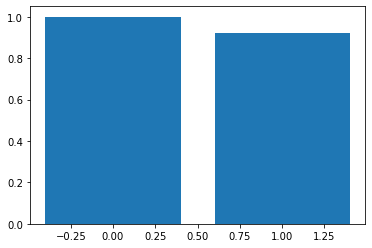

In [49]:
# matpplotlib bar plot
plt.bar(x = main_df['left'], height = main_df['satisfaction_level'])

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

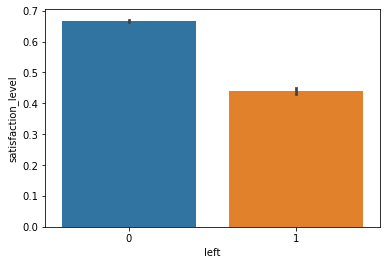

In [50]:
# seaborn bar graph
sns.barplot(x = 'left', y = 'satisfaction_level', data = main_df)

<AxesSubplot:xlabel='promotion_last_5years', ylabel='satisfaction_level'>

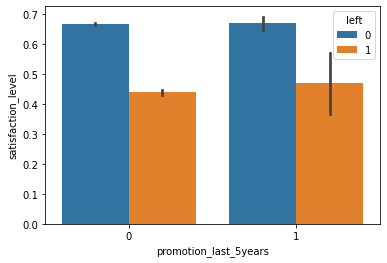

In [51]:
sns.barplot(x='promotion_last_5years', y = 'satisfaction_level', data = main_df, hue = 'left')

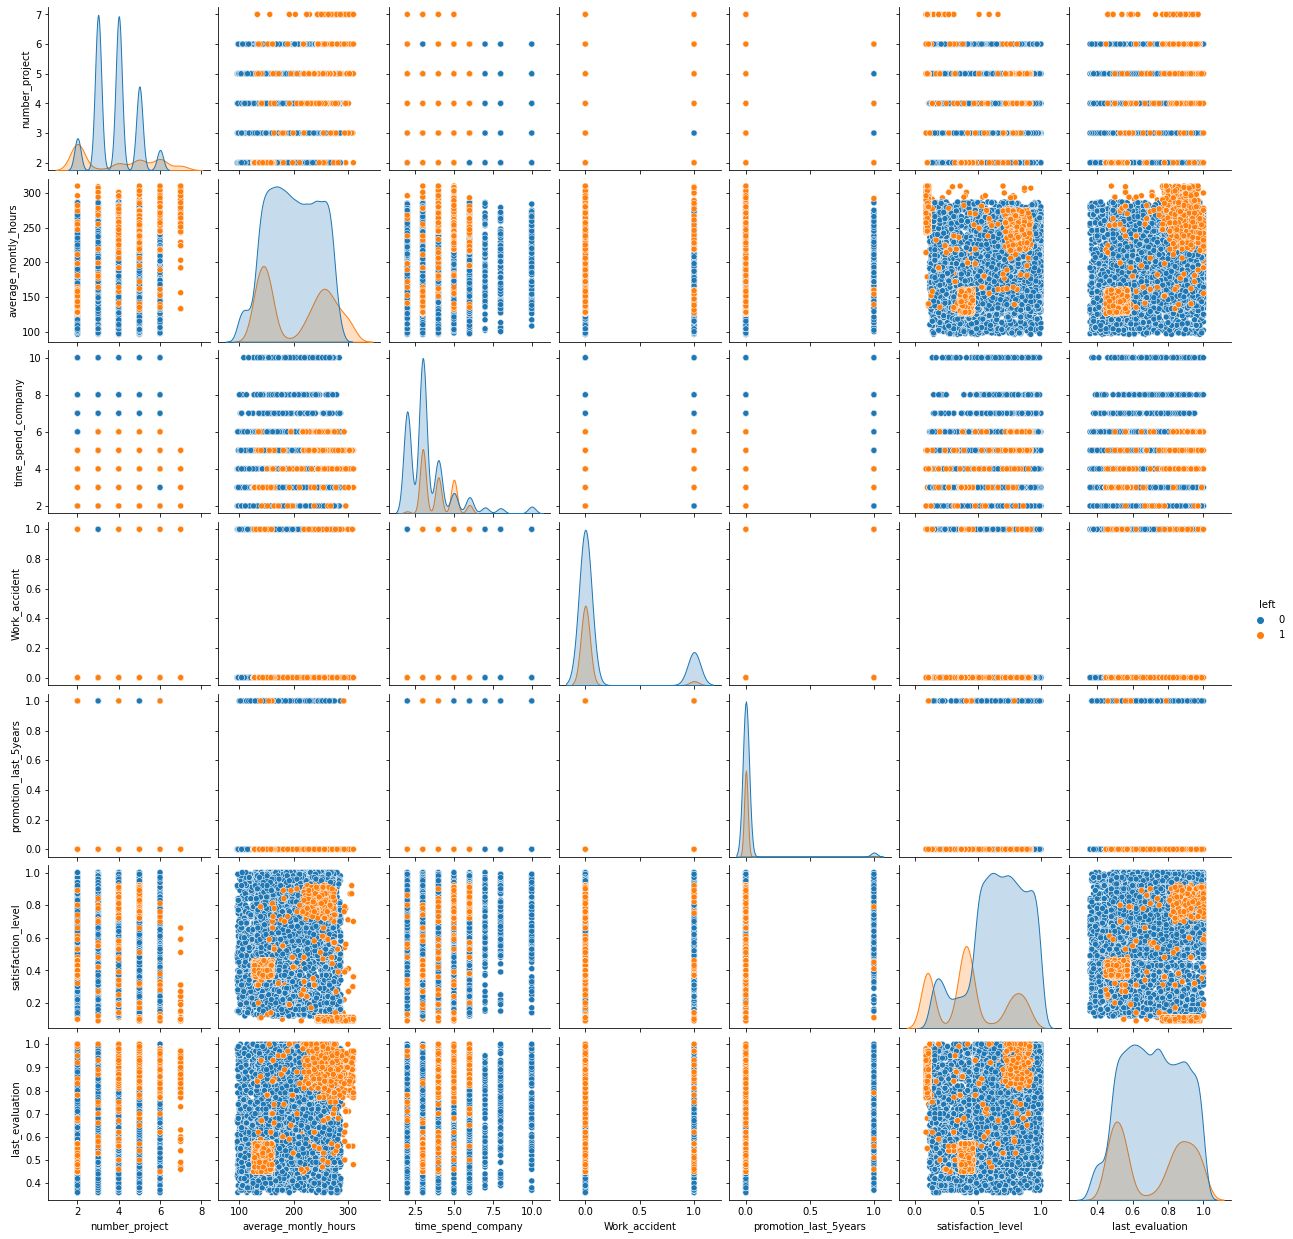

In [52]:
sns.pairplot(main_df, hue = 'left')

# Part 4 : Feature Engineering

### Label Encoding

In [53]:
# get the columns with categorical values
columns_to_convert = main_df[['department', 'salary']]

In [54]:
columns_to_convert

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
# label encode the salary column
le = LabelEncoder()
numerical_salary = le.fit_transform(main_df['salary'])

In [57]:
numerical_salary

array([1, 2, 2, ..., 1, 1, 1])

In [58]:
main_df['salary_num'] = numerical_salary

In [59]:
# since the dataframe is showing only low and medium  numerical values, we need to know the value for high
main_df.loc[main_df['salary']=='high']

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation,salary_num
72,2,149,3,0,1,0,product_mng,high,0.61283,0.716125,0
111,6,289,4,0,1,0,hr,high,0.09000,0.850000,0
189,2,156,3,0,1,0,technical,high,0.44000,0.510000,0
267,2,129,3,0,1,0,technical,high,0.45000,0.530000,0
306,2,149,3,0,1,0,marketing,high,0.37000,0.460000,0
...,...,...,...,...,...,...,...,...,...,...,...
14829,2,148,3,0,1,0,marketing,high,0.45000,0.570000,0
14868,2,130,3,0,1,0,support,high,0.43000,0.550000,0
14902,2,159,3,0,1,0,hr,high,0.45000,0.460000,0
14941,2,131,3,0,1,0,RandD,high,0.43000,0.490000,0


In [60]:
# now that the salary has been encoded, drop the categorical column of salary
main_df.drop(['salary'], axis =1,  inplace = True)

In [61]:
# do the same for departments

In [62]:
numerical_departments = le.fit_transform(main_df['department'])

In [63]:
main_df['department_num'] = numerical_departments

In [64]:
main_df.drop(['department'], axis =1,  inplace = True)

In [65]:
main_df.head(10)

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,salary_num,department_num
0,2,157,3,0,1,0,0.38,0.53,1,7
1,5,262,6,0,1,0,0.80,0.86,2,7
2,7,272,4,0,1,0,0.11,0.88,2,7
3,5,223,5,0,1,0,0.72,0.87,1,7
4,2,159,3,0,1,0,0.37,0.52,1,7
5,2,153,3,0,1,0,0.41,0.50,1,7
6,6,247,4,0,1,0,0.10,0.77,1,7
7,5,259,5,0,1,0,0.92,0.85,1,7
8,5,224,5,0,1,0,0.89,1.00,1,7
9,2,142,3,0,1,0,0.42,0.53,1,7


# Part 5 : Feature Selection

##### Split Data into Dependent and Independent variables

In [66]:
# our target variable will be 'left' column since we want to predict whether the employee will leave or not
X = main_df.drop(['left'], axis = 1)

In [67]:
X

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,salary_num,department_num
0,2,157,3,0,0,0.38,0.53,1,7
1,5,262,6,0,0,0.80,0.86,2,7
2,7,272,4,0,0,0.11,0.88,2,7
3,5,223,5,0,0,0.72,0.87,1,7
4,2,159,3,0,0,0.37,0.52,1,7
...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,0,0.40,0.57,1,8
14995,2,160,3,0,0,0.37,0.48,1,8
14996,2,143,3,0,0,0.37,0.53,1,8
14997,6,280,4,0,0,0.11,0.96,1,8


In [68]:
y = main_df['left']

In [69]:
y.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [70]:
y.size

14999

In [116]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

##### Split dataset into train and test dataset

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 6 : Model Building

Algorithms that will be used for this data are :

- Decision Tree Classifier
- K-nearest neighbour classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
DT_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
# checking for tthe right value of n_neighbours
k_range = range(1,26)
scores ={}
scores_list = []

for i in k_range:
    knn_classifier = KNeighborsClassifier(n_neighbors = i)
    knn_classifier.fit(X_train, y_train)
    y_pred_knn = knn_classifier.predict(X_test)
    scores[i] = accuracy_score(y_test, y_pred_knn)*100
    scores_list.append(accuracy_score(y_test, y_pred_knn))

In [79]:
scores

{1: 96.6,
 2: 96.17777777777778,
 3: 95.51111111111112,
 4: 95.26666666666667,
 5: 95.15555555555557,
 6: 95.31111111111112,
 7: 94.93333333333334,
 8: 95.15555555555557,
 9: 94.88888888888889,
 10: 94.91111111111111,
 11: 94.68888888888888,
 12: 94.71111111111111,
 13: 94.46666666666667,
 14: 94.6,
 15: 94.4888888888889,
 16: 94.6,
 17: 94.35555555555555,
 18: 94.35555555555555,
 19: 94.22222222222221,
 20: 94.28888888888889,
 21: 94.13333333333334,
 22: 94.11111111111111,
 23: 94.04444444444444,
 24: 94.08888888888889,
 25: 93.95555555555556}

In [80]:
scores_list

[0.966,
 0.9617777777777777,
 0.9551111111111111,
 0.9526666666666667,
 0.9515555555555556,
 0.9531111111111111,
 0.9493333333333334,
 0.9515555555555556,
 0.9488888888888889,
 0.9491111111111111,
 0.9468888888888889,
 0.9471111111111111,
 0.9446666666666667,
 0.946,
 0.9448888888888889,
 0.946,
 0.9435555555555556,
 0.9435555555555556,
 0.9422222222222222,
 0.9428888888888889,
 0.9413333333333334,
 0.9411111111111111,
 0.9404444444444444,
 0.9408888888888889,
 0.9395555555555556]

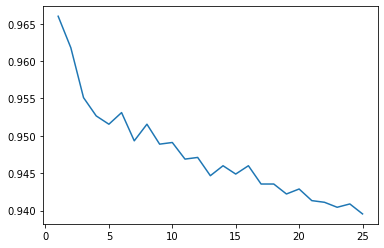

In [81]:
# plot rge resulta to see the best value for k
plt.plot(k_range, scores_list)

In [82]:
# we choose n = 3


# Part 7 : Model Evaluation

In [83]:
# testing Decision Tree
y_pred_DT = DT_classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [84]:
y_pred_knn = DT_classifier.predict(X_test)

##### Making Confusion Matrix for Decision Tree Classifier

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred_DT)
print('DECISION TREE CLASSIFIER')
print('Confusion Matrix : ')
print(cm)
print('Accuracy Score : ')
accuracy_DT=accuracy_score(y_test, y_pred_DT)
print('-'*70)


DECISION TREE CLASSIFIER
Confusion Matrix : 
[[3363   65]
 [  51 1021]]
Accuracy Score : 
----------------------------------------------------------------------


In [126]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3428
           1       0.94      0.95      0.95      1072

    accuracy                           0.97      4500
   macro avg       0.96      0.97      0.96      4500
weighted avg       0.97      0.97      0.97      4500



In [98]:
# check the most important parameter for the model
DT_classifier.feature_importances_


array([0.17957203, 0.09502716, 0.19374823, 0.00213134, 0.        ,
       0.35902154, 0.14981221, 0.00838459, 0.0123029 ])

In [117]:
# show in a nice dataframe way
feature_importance = pd.DataFrame(DT_classifier.feature_importances_)

In [118]:
feature_importance

,0
0,0.179572
1,0.095027
2,0.193748
3,0.002131
4,0.000000
5,0.359022
6,0.149812
7,0.008385
8,0.012303


##### Making Confusion Matrix for KNN Classifier

In [127]:
cm = confusion_matrix(y_test, y_pred_knn)
print('K-NEAREST NEIGHBOURS CLASSIFIER')
print('Confusion Matrix : ')
print(cm)
#print('Accuracy Score : '+accuracy_score(y_test, y_pred_knn)*100)
accuracy_knn=accuracy_score(y_test, y_pred_knn)
print('-'*70)
print(classification_report(y_test, y_pred_knn))

K-NEAREST NEIGHBOURS CLASSIFIER
Confusion Matrix : 
[[3363   65]
 [  51 1021]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3428
           1       0.94      0.95      0.95      1072

    accuracy                           0.97      4500
   macro avg       0.96      0.97      0.96      4500
weighted avg       0.97      0.97      0.97      4500



# Part 7 : Model Selection

C:\Users\Cash Crusaders\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



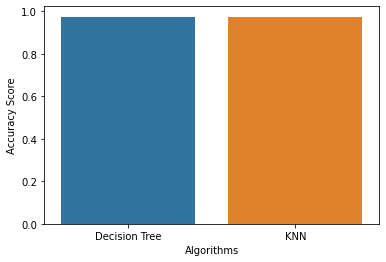

In [128]:
algorithms = ['Decision Tree', 'KNN']
scores = [accuracy_DT, accuracy_knn]
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
sns.barplot(algorithms, scores)
plt.show()

# Part 8 : Hyperparameter Tuning